##### Image Classification Using Keras
Ensure you are using GPU
Runtime -> Change Runtime Type -> T4 GPU

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
5


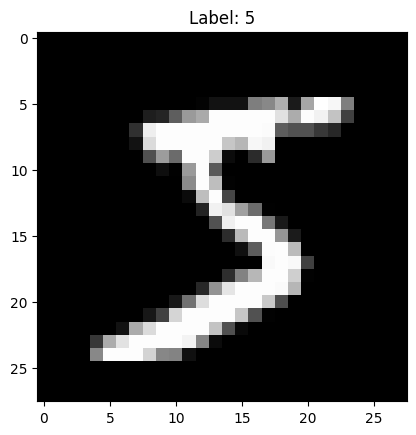

0 19092
1 27878
2 54017
3 52998
4 20990
5 32470
6 22673
7 23805
8 37606


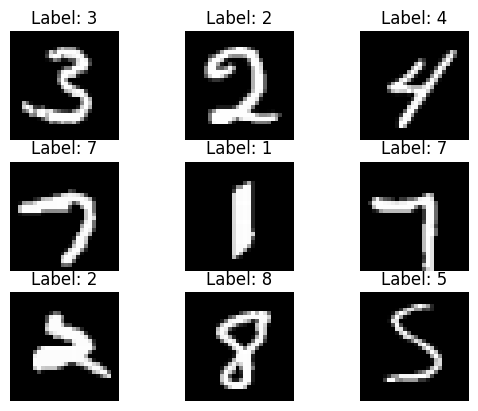

In [13]:
from warnings import filterwarnings; filterwarnings('ignore')

# Step-1: Data Ingestion
from keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print(xtrain[0][1])
print(ytrain[0])

# Plot Data
import matplotlib.pyplot as plt
plt.title(f'Label: {ytrain[0]}')
plt.imshow(xtrain[0], cmap='gray')
plt.show()

# import seaborn as sns
# plt.figure(figsize=(12, 12))
# sns.heatmap(xtrain[0], cmap='gray', annot=True, fmt='d')
# plt.title(f'Label: {ytrain[0]}')
# plt.show()

import numpy as np
random_idx = np.random.randint(1, xtrain.shape[0], 9)
for idx, image in enumerate(random_idx):
    print(idx, image)
    plt.subplot(3, 3, idx + 1)
    plt.imshow(xtrain[image],cmap='gray')
    plt.title(f'Label: {ytrain[image]}')
    plt.axis("off")